In [1]:
# Import libraries
import numpy as np
import keras
import cv2
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import os        # To see our directory
import random
import gc        # Garbage collector

Using TensorFlow backend.


In [2]:
train_dir = "../input/dogs-vs-cats-redux-kernels-edition/train"
test_dir = "../input/dogs-vs-cats-redux-kernels-edition/test"

train_cats = ["../input/dogs-vs-cats-redux-kernels-edition/train/{}".format(i) for i in os.listdir(train_dir) if 'cat.' in i]
train_dogs = ["../input/dogs-vs-cats-redux-kernels-edition/train/{}".format(i) for i in os.listdir(train_dir) if 'dog.' in i]

#import matplotlib.image as mpimg
#for ima in train_dogs[0:5]:
#    img = mpimg.imread(ima)
#    imgplot = plt.imshow(img)
#    plt.show()

train_images = train_cats[:2000] + train_dogs[:2000]
random.shuffle(train_images)

del train_cats, train_dogs
gc.collect()

#cnt = 0
#import matplotlib.image as mpimg
#for ima in train_images[0:5]:
#    cnt += 1
#    if 'cat' in ima:
#        print(cnt, "cat")
#    if 'dog' in ima:
#        print(cnt, "dog")
#    img = mpimg.imread(ima)
#    imgplot = plt.imshow(img)
#    plt.show()

41

In [3]:
# Image dimensions

nrows = 200
ncolumns = 200
# RGB are 3 channels
# For greyscale, 1 channel
channels = 3

In [4]:
def read_and_process_image(list_of_images):
    # X is an array of resized images
    # y is an array of labels
    #print(len(list_of_images))
    X = []
    y = []
    #cnt = 0
    for image in list_of_images :
        #cnt += 1
        #if 'cat' in image:
            #print(cnt, "This is a cat")
        #if 'dog' in image:
            #print(cnt, "This is a dog")
        # Read the image
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation=cv2.INTER_CUBIC))
        # Get the labels
        if 'dog.' in image:
            #print("dog entered")
            y.append(1)
        elif 'cat.' in image:
            #print("cat entered")
            y.append(0)
            
    return X, y

In [5]:
X, y = read_and_process_image(train_images)
#print(y)
del train_images
gc.collect()

X = np.array(X)
y = np.array(y)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=2)

print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_val.shape)
print("Shape of train labels is:", y_train.shape)
print("Shape of validation labels is:", y_val.shape)

Shape of train images is: (3200, 200, 200, 3)
Shape of validation images is: (800, 200, 200, 3)
Shape of train labels is: (3200,)
Shape of validation labels is: (800,)


In [7]:
# Clear memory
del X
del y
gc.collect()

# Get the length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)

batch_size = 32

In [8]:
# Built and fit CNN

from keras import models
from keras import layers
from keras import optimizers

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

          

In [9]:
# Compile the model

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# Image generators

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [12]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain//batch_size,
                              epochs=64,
                             validation_data=val_generator,
                             validation_steps=nval//batch_size)

Epoch 1/64
100/100 [==============================] - 25s 255ms/step - loss: 0.6925 - acc: 0.5228 - val_loss: 0.6959 - val_acc: 0.4900
Epoch 2/64
100/100 [==============================] - 24s 244ms/step - loss: 0.6754 - acc: 0.5794 - val_loss: 0.6447 - val_acc: 0.5838
Epoch 3/64
100/100 [==============================] - 24s 244ms/step - loss: 0.6531 - acc: 0.6012 - val_loss: 0.6570 - val_acc: 0.6150
Epoch 4/64
100/100 [==============================] - 24s 243ms/step - loss: 0.6410 - acc: 0.6278 - val_loss: 0.6289 - val_acc: 0.6225
Epoch 5/64
100/100 [==============================] - 24s 243ms/step - loss: 0.6247 - acc: 0.6516 - val_loss: 0.7381 - val_acc: 0.5850
Epoch 6/64
100/100 [==============================] - 25s 251ms/step - loss: 0.6103 - acc: 0.6606 - val_loss: 0.5852 - val_acc: 0.6650
Epoch 7/64
100/100 [==============================] - 24s 241ms/step - loss: 0.6051 - acc: 0.6581 - val_loss: 0.5424 - val_acc: 0.6600
Epoch 8/64
100/100 [==============================] - 2

In [13]:
# Save the model

model.save_weights('model_weights.h5')
model.save('model_keras.h5')

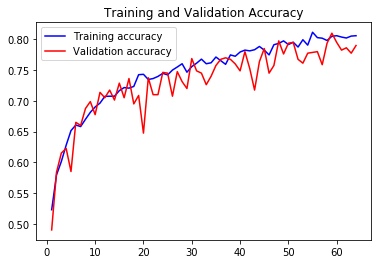

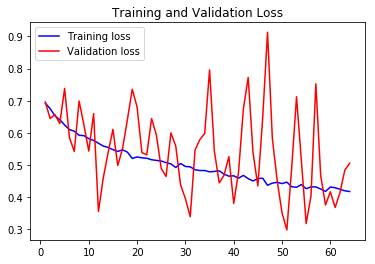

In [14]:
# Train and validation curves

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [15]:
test_images = ['../input/dogs-vs-cats-redux-kernels-edition/test/{}'.format(i) for i in os.listdir(test_dir)]

In [16]:
X_test, y_test = read_and_process_image(test_images[:10])
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)

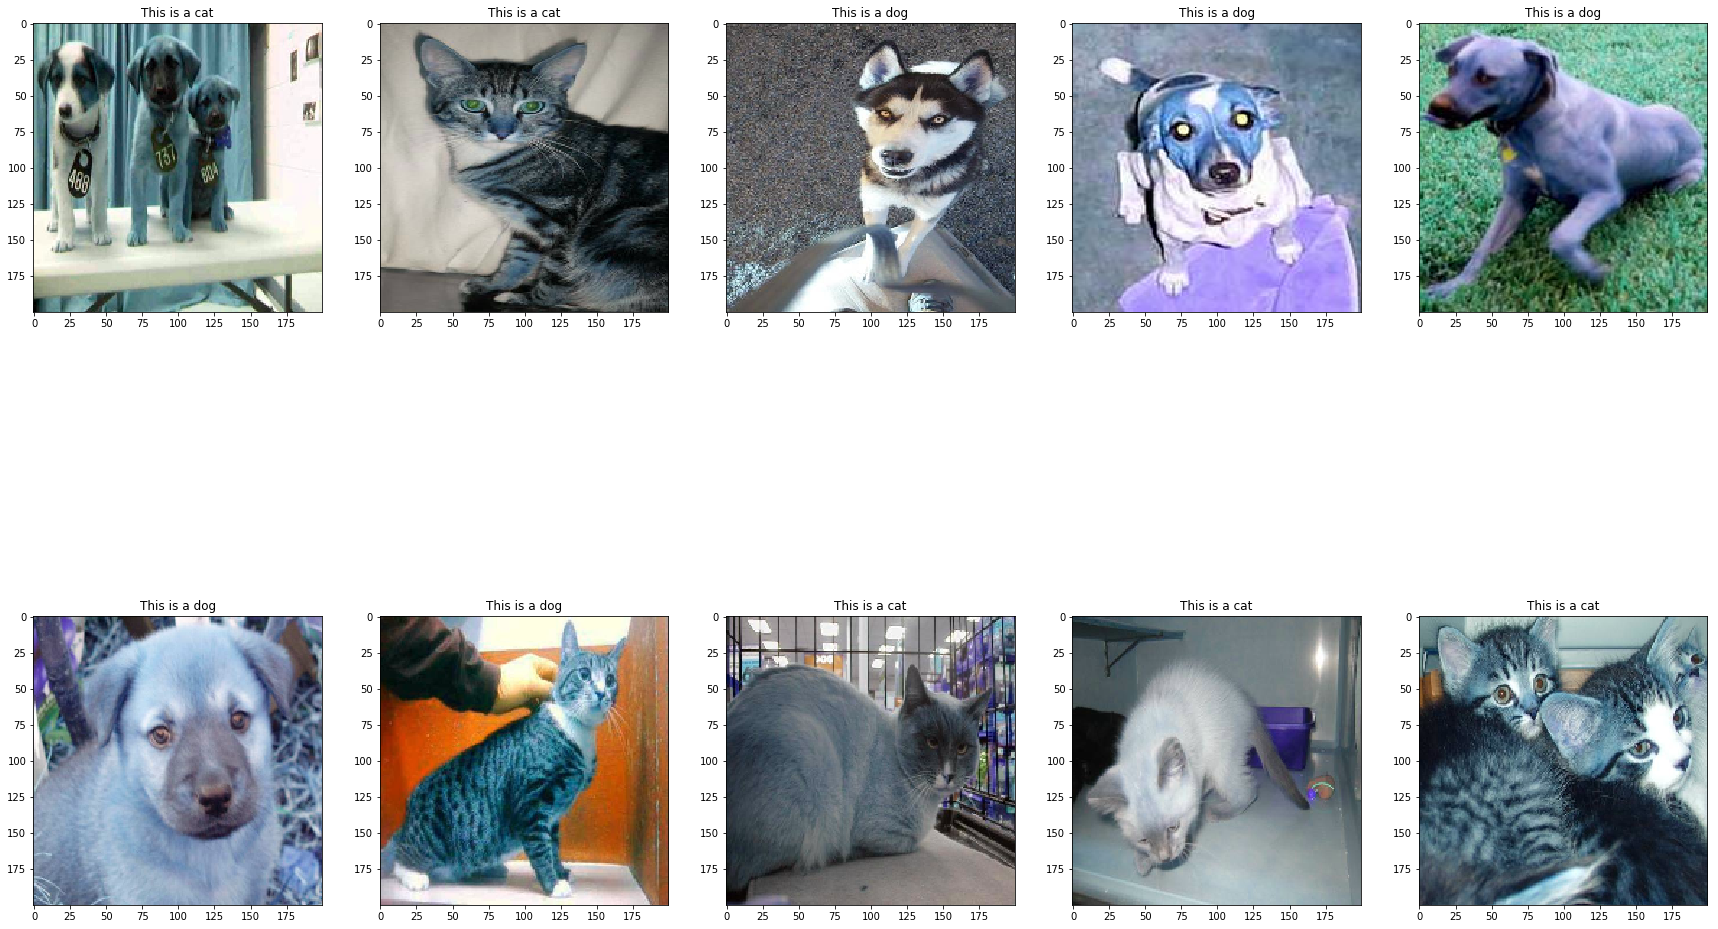

In [17]:
i = 0
columns = 5
text_labels = []
plt.figure(figsize=(30, 20))

for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('dog')
    else:
        text_labels.append('cat')
    
    #print(text_labels)
    
    plt.subplot(5 / columns + 1, columns, i+1)
    plt.title('This is a ' + str(text_labels[i]))
    imgplot = plt.imshow(batch[0])
    
    i += 1
    if i % 10 == 0:
        break
plt.show()